In [1]:
import glob
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette2 = palettable.colorbrewer.diverging.RdYlGn_4_r
palette1 = palettable.lightbartlein.diverging.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap1 = palette1.mpl_colormap
cmap2 = palette2.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


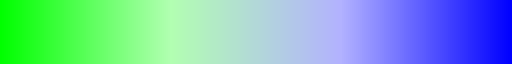

In [4]:
cmap1

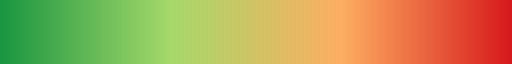

In [5]:
cmap2

In [6]:
palette2.mpl_colors

[(0.10196078431372549, 0.5882352941176471, 0.2549019607843137),
 (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 (0.9921568627450981, 0.6823529411764706, 0.3803921568627451),
 (0.8431372549019608, 0.09803921568627451, 0.10980392156862745)]

# Reading Cl exchange Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [7]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
home_dir = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory'
sub_dir = '/data_processing/20220329_XPD_Oceanview'
subfolder = glob.glob(home_dir + sub_dir + '/20220330_CsPb_66mMBr_10min**')
subfolder.sort()
# # del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220330_CsPb_66mMBr_10min
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220330_CsPb_66mMBr_10min_08uL_Cl
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220330_CsPb_66mMBr_10min_16uL_Cl
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220330_CsPb_66mMBr_10min_32uL_Cl
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220330_CsPb_66mMBr_10min_64uL_Cl


In [8]:
# dilute_list = [os.path.basename(i) for i in subfolder]
# dilute_list
# # np.float32(re.findall(r'\d+', dilute_list[0]))

In [9]:
# dilute_ratio = []
# for i in range(len(dilute_list)):
#     rates = np.float32(re.findall(r'\d+', dilute_list[i]))
#     # c = rates[:2].sum() / rates.sum()
#     c = 1/rates[-1]
#     dilute_ratio.append(c)
# dilute_ratio

In [10]:
# dilute_factor = np.asarray([1.0, 1.0, 1.5, 2.0, 2.0, 2.5, 3.0, 3.5, 4.0])
# dilute_ratio = 1/dilute_factor

In [11]:
# dilute_ratio

In [12]:
sample_list = ['Br', 'Cl_08uL', 'Cl_16uL', 'Cl_32uL', 'Cl_64uL']

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [13]:
df_Cl = pd.DataFrame()
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
# integration_time = ['300ms']

for i in range(len(subfolder)):
# for i in range(len(sample_list)):
    data_files = glob.glob(subfolder[i] + f'/**.txt')
    data_files.sort()
    # del data_files[-1]
    # suffix = os.path.basename(subfolder_PL[i])
    suffix = sample_list[i]
    # id0 = 8
    # id1 = 22

    skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    for k in range(len(data_files)):        
        df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
        df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
        # df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep=',')
        # df_temp = pd.concat([df_temp, df_int['Fluorescence']], axis=1, ignore_index=False)

    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df_Cl[f'x_{suffix}'] = df_int['Wavelength']
    df_Cl[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

In [14]:
i

4

## Export PL of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [15]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df.to_csv('20230829_CsPbBr_PL.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [16]:
df_Cl

,x_Br,Br_mean,x_Cl_08uL,Cl_08uL_mean,x_Cl_16uL,Cl_16uL_mean,x_Cl_32uL,Cl_32uL_mean,x_Cl_64uL,Cl_64uL_mean
0,196.263,-0.5855,196.263,-0.3315,196.263,-0.6500,196.263,-0.3385,196.263,-0.5795
1,197.066,0.1590,197.066,0.0115,197.066,-0.1120,197.066,-0.1695,197.066,-0.0295
2,197.870,1.1330,197.870,0.8055,197.870,0.8760,197.870,0.9435,197.870,1.0465
3,198.673,-0.8050,198.673,-0.7320,198.673,-0.7565,198.673,-0.9590,198.673,-0.8290
4,199.476,1.8475,199.476,7.7175,199.476,16.5620,199.476,8.5980,199.476,3.9025
...,...,...,...,...,...,...,...,...,...,...
1039,989.419,2.4515,989.419,1.9685,989.419,2.2435,989.419,1.3225,989.419,1.2580
1040,990.139,0.2645,990.139,0.4865,990.139,0.3565,990.139,0.3545,990.139,0.3590
1041,990.860,-0.7660,990.860,-0.6825,990.860,-0.5300,990.860,-0.7265,990.860,-0.2975
1042,991.581,0.7770,991.581,0.7940,991.581,0.9760,991.581,0.8930,991.581,0.6840


## Check data in pd dataframe

In [17]:
df_Cl.keys()

Index(['x_Br', 'Br_mean', 'x_Cl_08uL', 'Cl_08uL_mean', 'x_Cl_16uL',
       'Cl_16uL_mean', 'x_Cl_32uL', 'Cl_32uL_mean', 'x_Cl_64uL',
       'Cl_64uL_mean'],
      dtype='object')

In [18]:
df_Cl.shape

(1044, 10)

## Prepare keys for average scans in pd dataframe

In [19]:
keys_list = list(df_Cl.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_Br',
 'Br_mean',
 'x_Cl_08uL',
 'Cl_08uL_mean',
 'x_Cl_16uL',
 'Cl_16uL_mean',
 'x_Cl_32uL',
 'Cl_32uL_mean',
 'x_Cl_64uL',
 'Cl_64uL_mean']

In [20]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title = keys_list[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

Br_mean
Cl_08uL_mean
Cl_16uL_mean
Cl_32uL_mean
Cl_64uL_mean


## Plot all PL scans together

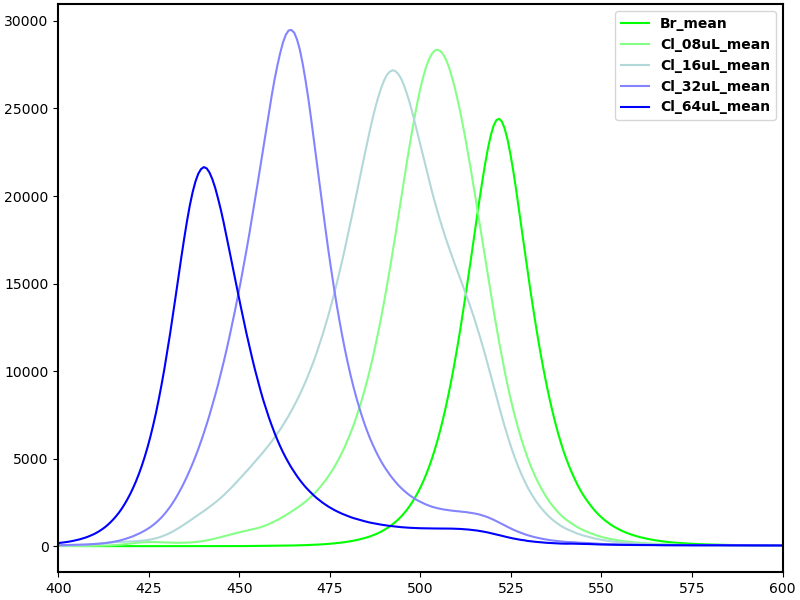

In [21]:
f1, ax1 = plt.subplots(1, 1, figsize = (8, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = 30

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    # t = re.findall(r'\d+', title[i])[-1]
    ax1.plot(df_Cl[keys_list[i*2]], df_Cl[keys_list[i*2+1]], color=cmap1(color_idx[i]), label=label[i][:id1])
        
legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)
# ax1[1].legend(prop=legend_properties)

ax1.set_xlim(400, 600)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df_Cl[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df_Cl[keys_list[0]], wavelength_range[1])

# ax1.axvline(w0)
# ax1.axvline(w1)

# Reading I exchange Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [22]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
home_dir = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory'
sub_dir = '/data_processing/20220329_XPD_Oceanview'
subfolder = glob.glob(home_dir + sub_dir + '/20220331_CsPb_66mMBr_10min**')
subfolder.sort()
# # del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220331_CsPb_66mMBr_10min
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220331_CsPb_66mMBr_10min_08uL_I
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220331_CsPb_66mMBr_10min_16uL_I
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220331_CsPb_66mMBr_10min_32uL_I
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220331_CsPb_66mMBr_10min_64uL_I


In [23]:
# dilute_list = [os.path.basename(i) for i in subfolder]
# dilute_list
# # np.float32(re.findall(r'\d+', dilute_list[0]))

In [24]:
# dilute_ratio = []
# for i in range(len(dilute_list)):
#     rates = np.float32(re.findall(r'\d+', dilute_list[i]))
#     # c = rates[:2].sum() / rates.sum()
#     c = 1/rates[-1]
#     dilute_ratio.append(c)
# dilute_ratio

In [25]:
# dilute_factor = np.asarray([1.0, 1.0, 1.5, 2.0, 2.0, 2.5, 3.0, 3.5, 4.0])
# dilute_ratio = 1/dilute_factor

In [26]:
# dilute_ratio

In [27]:
sample_list = ['Br', 'I_08uL', 'I_16uL', 'I_32uL', 'I_64uL']

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [28]:
df_I = pd.DataFrame()
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
# integration_time = ['300ms']

for i in range(len(subfolder)):
# for i in range(len(sample_list)):
    data_files = glob.glob(subfolder[i] + f'/**.txt')
    data_files.sort()
    # del data_files[-1]
    # suffix = os.path.basename(subfolder_PL[i])
    suffix = sample_list[i]
    # id0 = 8
    # id1 = 22

    skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    for k in range(len(data_files)):        
        df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
        df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
        # df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep=',')
        # df_temp = pd.concat([df_temp, df_int['Fluorescence']], axis=1, ignore_index=False)

    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df_I[f'x_{suffix}'] = df_int['Wavelength']
    df_I[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

In [29]:
df_temp

,PL_000,PL_001,PL_002,PL_003,PL_004,PL_005,PL_006,PL_007,PL_008,PL_009,PL_010,PL_011,PL_012,PL_013,PL_014,PL_015,PL_016,PL_017,PL_018,PL_019
0,-0.75,0.03,-0.34,-1.53,0.45,0.64,0.64,-1.55,-0.58,-1.77,0.55,0.38,-0.86,-0.75,-0.69,-0.53,-0.66,-0.09,-0.09,-0.16
1,-0.50,-0.22,0.53,0.34,-1.55,-0.11,-1.98,-1.17,-0.70,0.23,-1.20,0.00,0.77,-0.75,0.44,-0.28,1.22,-0.72,0.03,-1.03
2,2.12,-0.09,1.41,0.84,0.08,0.89,0.64,1.33,0.67,1.23,0.92,0.12,0.89,0.25,1.31,1.22,-0.03,1.03,1.66,0.72
3,-0.88,-0.34,-1.47,-0.91,0.20,-1.36,-1.11,-0.80,0.55,-0.27,-1.33,-0.62,-0.86,0.62,-0.94,-0.41,-1.28,-0.72,-0.72,-0.91
4,0.88,0.53,0.53,0.47,1.83,1.89,-0.61,2.20,1.05,2.11,0.30,0.50,1.14,0.88,2.06,2.72,-0.28,1.28,-0.47,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.88,-0.22,1.41,0.97,0.08,-0.23,0.14,3.08,0.80,1.11,-0.08,0.38,1.27,2.62,2.81,1.09,0.72,1.28,1.41,2.34
1040,0.75,0.16,-0.47,1.22,2.45,0.52,-0.36,1.08,1.30,-0.52,0.30,0.62,0.27,1.00,1.31,-0.28,0.47,0.16,0.16,0.09
1041,-0.75,-0.84,-0.09,-2.03,-0.92,-1.23,1.52,1.08,0.05,-0.52,-0.58,-1.75,-1.61,-2.00,-0.81,-0.41,-0.03,-0.97,-2.09,-0.03
1042,0.62,1.66,0.78,1.84,0.58,2.14,0.64,0.33,-0.20,1.11,0.55,0.75,1.14,1.25,-0.19,-0.41,1.47,1.41,1.28,1.97


## Export PL of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [30]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df.to_csv('20230829_CsPbBr_PL.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [31]:
df_I

,x_Br,Br_mean,x_I_08uL,I_08uL_mean,x_I_16uL,I_16uL_mean,x_I_32uL,I_32uL_mean,x_I_64uL,I_64uL_mean
0,196.263,-0.242000,196.263,-0.5475,196.263,-0.3815,196.263,-0.3275,196.263,-0.3830
1,197.066,-0.048667,197.066,-0.1990,197.066,-0.1560,197.066,-0.1645,197.066,-0.3325
2,197.870,1.033333,197.870,0.7455,197.870,0.7755,197.870,0.8665,197.870,0.8605
3,198.673,-0.958000,198.673,-0.5555,198.673,-0.7065,198.673,-1.0965,198.673,-0.6780
4,199.476,1.650667,199.476,1.4320,199.476,1.1445,199.476,1.0165,199.476,0.9990
...,...,...,...,...,...,...,...,...,...,...
1039,989.419,3.025333,989.419,1.0390,989.419,1.2940,989.419,1.6790,989.419,1.0930
1040,990.139,0.574667,990.139,0.3955,990.139,0.2190,990.139,0.5425,990.139,0.5115
1041,990.860,-0.541333,990.860,-0.5175,990.860,-0.4435,990.860,-0.6020,990.860,-0.7005
1042,991.581,0.600000,991.581,0.8200,991.581,0.8000,991.581,0.7730,991.581,0.9360


## Check data in pd dataframe

In [32]:
df_I.keys()

Index(['x_Br', 'Br_mean', 'x_I_08uL', 'I_08uL_mean', 'x_I_16uL', 'I_16uL_mean',
       'x_I_32uL', 'I_32uL_mean', 'x_I_64uL', 'I_64uL_mean'],
      dtype='object')

In [33]:
df_I.shape

(1044, 10)

## Prepare keys for average scans in pd dataframe

In [34]:
keys_list = list(df_I.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_Br',
 'Br_mean',
 'x_I_08uL',
 'I_08uL_mean',
 'x_I_16uL',
 'I_16uL_mean',
 'x_I_32uL',
 'I_32uL_mean',
 'x_I_64uL',
 'I_64uL_mean']

In [35]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title = keys_list[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

Br_mean
I_08uL_mean
I_16uL_mean
I_32uL_mean
I_64uL_mean


## Plot all PL scans together

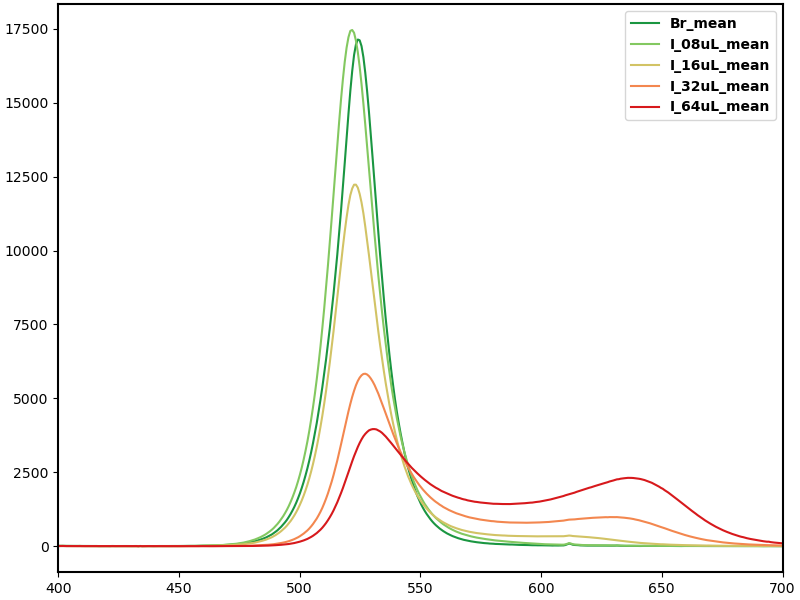

In [36]:
f1, ax1 = plt.subplots(1, 1, figsize = (8, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = 30

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    # t = re.findall(r'\d+', title[i])[-1]
    ax1.plot(df_I[keys_list[i*2]], df_I[keys_list[i*2+1]], color=cmap2(color_idx[i]), label=label[i][:id1])
        
legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)
# ax1[1].legend(prop=legend_properties)

ax1.set_xlim(400, 700)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df_I[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df_I[keys_list[0]], wavelength_range[1])

# ax1.axvline(w0)
# ax1.axvline(w1)